In [1]:
import numfracpy as nfr
import scipy.special as special
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc

rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
%matplotlib inline

# Riemann–Liouville Integral

nfr.RL_integral(g,a,t,nu)

Returns: Numerical Value of Riemann Liouville integral

The left fractional integral (or left Riemann Liouville integral) of order $0<\alpha<1$ of the given function $g(t)$ [see definition in Eq. (1.1) in Numerical Methods for Fractional Calculus] is defined as

$$D_{a,t}^{-\alpha} g(t) = {}_{RL}D_{a,t}^{-\alpha} g(t) = \frac{1}{\Gamma(\alpha)}\int_a^t (t-s)^{\alpha - 1}g(s)ds$$

where $\Gamma(\cdot)$ donotes the Gamma funtion.

### Example: Fractional Integral of $g(t)=t^{\mu}$

It is stated in [Example 5, Fractional Calculus by David Allan Miller] the following relation

$${}_{RL}D_{0,t}^{-\alpha} t^{\mu} = \frac{\Gamma(\mu + 1)}{\Gamma(\alpha + \mu + 1)}t^{\mu + \alpha}$$

where $\mu > -1$ and $\alpha > 0$. <br>
Let us check this relation for $\mu = \alpha = 1/2$.

In [2]:
def g(t):
    return t**(1/2)
def g_integ(t,alpha):
    return special.gamma(3/2)*(t**(1/2+alpha))/special.gamma(3/2+alpha)

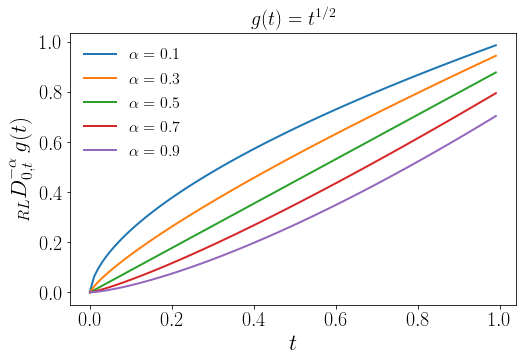

In [3]:
fig = plt.figure(figsize=(8,5))
plt.title(r'$g(t)=t^{1/2}$',y=1.01,size=20)

for alpha in np.linspace(0.1,0.9,5):
    T_list=[]
    Integral=[]
    t=0.0001
    while t<=1:
        T_list.append(t)
        Integral.append(nfr.RL_integral(g,0,t,alpha))
        t+=0.01
    T = np.array(T_list)
    plt.plot(T,Integral, label=r'$\alpha='+str(round(alpha,1))+'$',linewidth=2)

plt.legend(shadow=False,ncol=1,prop={'size':16},frameon=False)
#loc=(1,0.2)
#plt.legend(loc=4,shadow=False,ncol=1,prop={'size':16})
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel(r'$t$',size=23)
plt.ylabel(r'${}_{RL} D_{0,t}^{-\alpha}\, g(t)$',size=23)
plt.show()
fig.savefig('RL_integral_1.png',dpi=100,bbox_inches='tight')

### Example: Fractional Derivative of $g(t)=\ln(t)$

It is stated in [Example 11, Fractional Calculus by David Allan Miller] the following relation

$${}_{RL}D_{0,t}^{-\alpha} \ln t = \frac{t^{\alpha}}{\Gamma(\alpha + 1)}\left[\ln t - \gamma - \Psi(\alpha + 1) \right]$$

where $\gamma = 0.577215\dots$ is the Euler's constant and $\Psi$ is the digamma function defined as

$$\Psi(z) = \frac{d}{dz}\ln\left(\Gamma(z)\right) = \frac{\Gamma'(z)}{\Gamma(z)}$$

Let us check this relation for $\alpha = 1/2$.

In [4]:
def g(t):
    return np.log(t)
def g_integ(t,nu):
    return (t**nu)*(np.log(t) - np.euler_gamma - special.digamma(nu + 1))/special.gamma(nu + 1)

/Users/jorgelopez/Desktop/Research_UMariana/RESEARCH/Dinamica de Estructuras con una Mirada al Calculo Fraccional/Building Python Library/Numfracpy/numfracpy.py:14: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(x2, a, t)[0]
/Users/jorgelopez/Desktop/Research_UMariana/RESEARCH/Dinamica de Estructuras con una Mirada al Calculo Fraccional/Building Python Library/Numfracpy/numfracpy.py:14: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(x2, a, t)[0]
/Users/jorgelopez/Desktop/Research_UMariana/RESEARCH/Dinamica de Estructuras con una Mirada al Calculo Fraccional/Building Python Library/Numfracpy/numfracpy.py:14: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return i

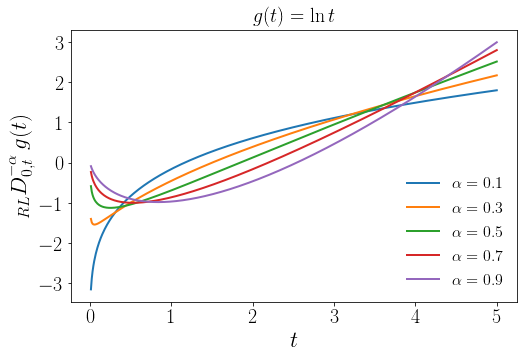

In [5]:
fig = plt.figure(figsize=(8,5))
plt.title(r'$g(t)=\ln t$',y=1.01,size=20)

for alpha in np.linspace(0.1,0.9,5):
    T_list=[]
    Integral=[]
    t=0.01
    while t<=5:
        T_list.append(t)
        Integral.append(nfr.RL_integral(g,0,t,alpha))
        t+=0.01
    T = np.array(T_list)
    plt.plot(T,Integral, label=r'$\alpha='+str(round(alpha,1))+'$',linewidth=2)

#plt.plot(T,g_integ(T,0.1), '--', label=r'Analytical')
plt.legend(shadow=False,ncol=1,prop={'size':16},frameon=False)
#plt.legend(loc=4,shadow=False,ncol=1,prop={'size':16})
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel(r'$t$',size=23)
plt.ylabel(r'${}_{RL} D_{0,t}^{-\alpha}\, g(t)$',size=23)
plt.show()
fig.savefig('RL_integral_2.png',dpi=100,bbox_inches='tight')